In [ ]:
Recap
=====
Day1 - numpy pandas webparsing api(json) database ..
Day2 - matplotlib seaborn Pyspark
============================//DataAnalysis ->RawData ->Clean ->EDA->Visualization
Day3 - PySpark
          |->Bigdata 
open a dataset - small(filesize;system H/w;storedData) --> pandas 
Vs
dataset - largedata+streaming =>PySpark
                                    |->distributed data process - parallel
flink + delata-lake ..
Day4 - ML =>Framework - stremlit - mlflow //project
Day5 - Grafana .. Prometheus..//CM

DataCollection ->Data Preprocessing(Cleaning) ->EDA and Visualization =>ModelSelection->(A)
(A) => Model Training => Model Evaluation => Deployment =>Monitoring =>ModelTuning

In [ ]:
General Programming
===================
     User => input -->[ m/c ]-->output

ML Programming
================    -------
 User  ---input---> | m/c  | --->--- model (algorithm)
       ---output--> |------|

numpy  - numerical operation
pandas - dataprocessing
matplotlib/seaborn - data visualization
Scikit-learn - ML models
|
Api - Framework + streamlit (webUI)
docker + KDE 
Cloud -
 - aws - sagemaker 
 - azure - MLStudio 
 - GCP Vertext AI 
 - OCI OCI DS 
|
Monitor - Grafana and Prometheus (or) MLflow 
==============================================================================
 ML ->DL ->GenAI
           =====

GenAI           -----> AI Agent 
 |->Text -- llm
 |->Image
 |->Audio
 |->Video
    ..
CPU ->GPU ->LPU

health.pdf - 100 page contents
==============================
     |--------------------<model>------->Vector(numbers) ->[DB] - llm ->chat 
                                                                Q: ....
     +
    Api - internet(wikipedia ... ..)


AI Agent + Memory + ... =>Agentic AI

    Agent1 -------- Agent2
                     ....
           -------- Agent3 

In [2]:
from scipy import stats
stats.linregress

<function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>

In [4]:
X = [5,7,8,9,10,13,15]
Y = [67,86,98,110,120,134,256]

slope,inter,r,p,std_err = stats.linregress(X,Y)

In [5]:
import matplotlib.pyplot as plt

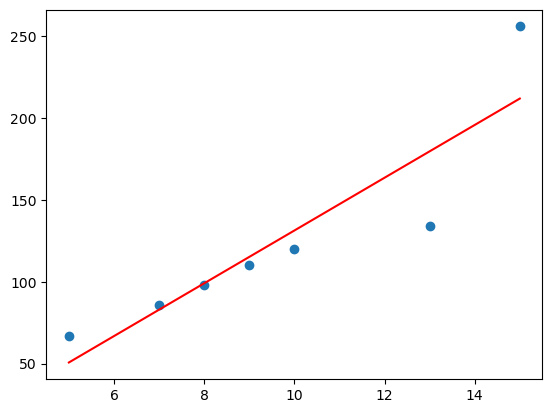

In [9]:
def fx(a):
    return slope*a+inter # y=mx+C

result = list(map(fx,X))

plt.scatter(X,Y)
plt.plot(X,result,'r')

In [10]:
fx(20)

np.float64(292.57370517928285)

In [11]:
fx(5)

np.float64(50.72111553784862)

In [12]:
from sklearn.datasets import load_iris

In [14]:
import sklearn.datasets

In [16]:
#help(sklearn.datasets)

In [19]:
from sklearn.datasets import load_iris
#load_iris()

In [ ]:
Random Forest
Collection - ensemble =>based on avg/vote ->predictions 
----------------------------
Student ->HighStudies 
     ->which department to select for higher studies 

Student -->friend1  => Physics  ---------- 
Student -->teacher  => Mathematics        |  ->  [Physics]
Student -->Uncle    => Physics  -----------
Student -->friend2  => Civil              |

from sklearn.ensemble import RandomForestClassifier


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
#help(RandomForestClassifier)

In [29]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# load dataset - cleaned dataset <== comes from DataEngineering(Source)/DataAnalysis
data = load_iris()
X = data.data
Y = data.target

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

# Create model 
model = RandomForestClassifier(n_estimators=100,random_state=42)

# Train
model.fit(X_train,y_train)

# Predict 
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.9833333333333333

In [32]:
import pandas as pd
import numpy as np

In [37]:
data = {'Hrs':[1,1.5,2.5,3.0,3.5],'Score':[30,44,55,70,80]}

df = pd.DataFrame(data)

X = df[['Hrs']] # independent 
Y = df[['Score']] # dependent

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [42]:
print(model.intercept_)
print(model.coef_[0])

[12.04651163]
[19.02325581]


In [43]:
Hr=5.5
model.predict([[Hr]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[116.6744186]])

In [ ]:
MeanAbsoluteError ->small close to zero(0) ->best fit
MeanSquaredError ->avg of square 
Vs
R2 (R-Squared) ==> close to 1 ->best fit
# evaluation

In [44]:
from sklearn.metrics import r2_score
Y_actual = Y
Y_predicted = model.predict(X)
r2_score(Y_actual,Y_predicted)

0.976960274724633

In [ ]:
mlflow
======
import mlflow 
with mlflow.start_run():
    mlflow.sklearn_log_model(model)

mlflow ui <= mlflow<space>ui {enter} => open ->5000 port
|
MLProject
---------------------------

project/
   |->data_ingestion.py  
   |->create_model.py
-----------------------------
|
airflow/
     |->dags/
         |->mlops_pipeline.py
            ---------------

schedule 
start webserver
start scheduler 
|
airflow login : ..
|
DAG name 

In [ ]:
Project/
    ---> data_ingestion.py
            - create DataFrame from dataset
                        |input_to_model
    ==>  create_model.py
            - model_creation
    |
  dags/
     |->mlops_pipeline.py
           |->load data_ingestion.py file =>from data_ingestion import <create_data_function>
           |->load create_model.py file =>from create_model import <create_model_function>
                 ..
               DAG('',... ....) ->dag
               |
               data_op = PythonOperator(
                   task_id = '',
                   python_callable = <create_data_function>
               )
                model_op = PythonOperator(
                   task_id = '',
                   python_callable = <create_model_function>
               )
                data_op >> model_op 

In [52]:
class box:
    def __init__(self):
        self.var = 10

obj = box()
# obj() TypeError: 'box' object is not callable
print(callable(obj))

False


In [54]:
def myfx():
    pass
print(callable(myfx))

True


In [55]:
print(type(myfx))

<class 'function'>


In [56]:
def myfx():
    print("Hello")

myfx()

Hello


In [57]:
myfx.__call__() # same as myfx()

Hello


In [58]:
class box:
    def __init__(self):
        self.msg="Hello"
    def __call__(self):
        return self.msg

obj = box()
callable(obj)

True

In [59]:
obj() # callable object 

'Hello'

In [ ]:
op=PythonOperator(
    task_id='',
    python_callable=<functionName>,
    dag=dag_obj
)


In [ ]:
To run mlops_pipeline activity
==================================
https://github.com/Palanikarthikeyan/DE_MLOPs-/tree/main/DAY4/mlops_pipeline

1. Go to lab ->wsl 
2. activate airflow environment
student@paka:~$ source airflow-Demo/airflow_project/bin/activate
(airflow_project) student@paka:~$
3. install mlflow scikit-learn => pip install mlflow scikit-learn {Enter}
|
4. Go to ~/airflow/dags directory => cd ~/airflow/dags

|
5. Download all the 3 files in same ~/airflow/dags directory

  ls ~/airflow/dags/{enter}
  create_model.py
  data_ingestion.py
  mlops_pipeline.py

6. vi create_model.py
   vi data_ingestion.py

   vi mlops_pipeline.py

7. start webserver => airflow webserver --port 8080 

8. open another ubuntu and activate env => airflow scheduler 
|
9. open airflow login => admin/admin => search ..


10. open another  ubuntu and activate env =>mlflow ui {Enter}
    |
    127.0.0.1:5000
==========================================================================
                                 

In [ ]:
Flask
======
 |->Web framework 
 |->python based - web framework
 |->MVT
 python decorator - meta programming ->Add more features to an existing code
Ex: 
Client =>  Home  AboutUs  News          => V1.0 
                            |->City1
                            |->City2
|
Client => Home AboutUs  News    Blogs <==    ==> V1.1  
                          |->City1
                          |->City2
                          |->City3 <==

  |-> templateCode jinj2 ,REST..

In [60]:
def f1(a):  # decorator 
    def f2(): # wrapper
        a() # newfeatures
    return f2

@f1
def City3():
    print('<h1>City3 news page</h1>')

@f1
def City4():
    print('Updated city4')

In [61]:
City3()

<h1>City3 news page</h1>


In [62]:
City4()

Updated city4


In [63]:
def City5():
    print("updated new City-5")

City5=f1(City5)
City5()

updated new City-5


In [ ]:
from flask import Flask  jsonify
     |              |     =======//function
     |              |->className
   module

obj = Flask(__name__)
|
@obj.route("/") # root url ex: https://www.abc.com  https://www.google.com 
def f1():
    return '<h1>Hello</h1>' # response webpage response 

@obj.route("/about") # https://www.abc.com/about https://www.google.com/about
def f2():
    return render_template('display.html') # response webpage response

@obj.route("/mydata")
def f3():
    data = {'pname': ['pA','pB'],'pid':[101,102]}
    return jsonify(data) # response data response 

if __name__ == '__main__':
    obj.run()


Project/
  |->App.py   <=== main flask app code
  |->requriements.txt  <== required python modules
  |->templates/
        |->index.html      <==  webpage response content
        |->display.html    <==  webpage response content
  |->static
        |->css/     <== CSS
        |->js/      <== js
  |->instance/
         |->config.py  <= configuration 



MLProject/
  |->App.py   <=== main flask app code
  |->model.pkl <=== Saved ML model 
  |->requriements.txt  <== required python modules
  |->templates/
        |->index.html      <==  webpage response content
        |->display.html    <==  webpage response content

jinja2 template 
================
    |->dynamic value  rendering
    |->supports conditional statement,looping statements 
{% if condition %}

{% endif %}
{% for var in <collection>%}

{% endfor %}
IND:555/4   <== <h1>IND:{{var}}</h2>
----======       ------- ====== -----

file: display.html
--------------------
<body>
  <h1>product name is:{{pname}}</h1>
 ..
 </body>

 @obj.route("/productview")
 def f1():
     return render_template('display.html',pname='pA') <== from flask

In [64]:
import os
os.getcwd()

'C:\\Users\\karth'

In [65]:
os.chdir("C:\\Users\\karth\\Karthik\\Oct-DATA\\DAY-4-Docs\\streamlitExamples\\")
os.getcwd()

'C:\\Users\\karth\\Karthik\\Oct-DATA\\DAY-4-Docs\\streamlitExamples'

In [66]:
! streamlit run p1.py

^C


In [67]:
! streamlit run p2.py

^C


In [68]:
! streamlit run p3.py

^C


In [69]:
os.chdir("C:\\Users\\karth\\Karthik\\Oct-DATA\\DAY-4-Docs\\")
os.getcwd()

'C:\\Users\\karth\\Karthik\\Oct-DATA\\DAY-4-Docs'

In [70]:
! streamlit run linearRegression_strem.py

^C


In [71]:
! streamlit run randomForestML.py

^C
